# Student performance - Mathematics

In [1]:
#Import library
import numpy as np
import pandas as pd
import random
from utils import distance, fairness_calculation, generate_data, f_cost, plot_analysis
from experiment import experiment_baseline, run_experiment_baseline, experiment_knapsack, run_experiment_knapsack, experiment_mfc_knapsack, run_experiment_mfc_knapsack,experiment_CPLEX, run_experiment_CPLEX
import matplotlib.pyplot as plt
import math

In [2]:
#data = pd.read_csv('student-mat.csv',sep=";")
#url = 'student-mat-synthetic-h3.csv'
n_wishes = 3
n_topic = 200 #1/2 of #instances
#df_generate = generate_data(data,len(data), n_wishes, n_topic,file=url)

D:\FairEdu\knapsack\MFC-knapsack h3\utils.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name]=None
D:\FairEdu\knapsack\MFC-knapsack h3\utils.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name][j]= random.randint(1,n_topic)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\FairEdu\knapsack

In [3]:
df = pd.read_csv('student-mat-synthetic-h3.csv')

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,T191,T192,T193,T194,T195,T196,T197,T198,T199,T200
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,0,0,0,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,9,0,0,0,0,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,0,0,0,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,0,0,0,0,0,0,0,0,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,0,0,0,0,0,0,0,0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,0,0,0,0,0,0,0,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,0,0,0,0,2,0,0,0,0,0


## Heuristic approach

In [5]:
#Parameters
min_of_min_cap = 2
max_of_min_cap = 18
diff_cap = 1
alpha = 1
beta = 1
protected_att = "sex"
male = 'M'

In [6]:
def balance_score(data,protected_att,male):
    n_student_m = len(data[data[protected_att]==male])
    n_student_f = len(df) - n_student_m
    print("female:",n_student_f)
    print("male:",n_student_m)
    return (n_student_f/n_student_m)

In [7]:
balance_score(df,protected_att,male)

female: 208
male: 187


1.1122994652406417

In [8]:
base_curr_min_cap, base_curr_nash, base_curr_satisfied, base_curr_balances, base_curr_capacities , base_curr_n_clusters, base_curr_count_instances, base_curr_tracking = run_experiment_baseline(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap,protected_att = protected_att,male = male,  alpha = alpha, beta = beta, verbose = True)

D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:130: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 1.293 seconds.
Time taken for min of capacity 3 : 0.890 seconds.
Time taken for min of capacity 4 : 0.917 seconds.
Time taken for min of capacity 5 : 0.894 seconds.
Time taken for min of capacity 6 : 0.839 seconds.
Time taken for min of capacity 7 : 1.049 seconds.
Time taken for min of capacity 8 : 0.885 seconds.
Time taken for min of capacity 9 : 0.869 seconds.
Time taken for min of capacity 10 : 0.890 seconds.
Time taken for min of capacity 11 : 0.834 seconds.
Time taken for min of capacity 12 : 0.971 seconds.
Time taken for min of capacity 13 : 0.878 seconds.
Time taken for min of capacity 14 : 0.830 seconds.
Time taken for min of capacity 15 : 0.952 seconds.
Time taken for min of capacity 16 : 0.892 seconds.
Time taken for min of capacity 17 : 0.867 seconds.
Time taken for min of capacity 18 : 0.914 seconds.


In [9]:
base_curr_nash_log = [math.log(base_curr_nash[id],base_curr_n_clusters[id]) for id in range(len(base_curr_nash))]

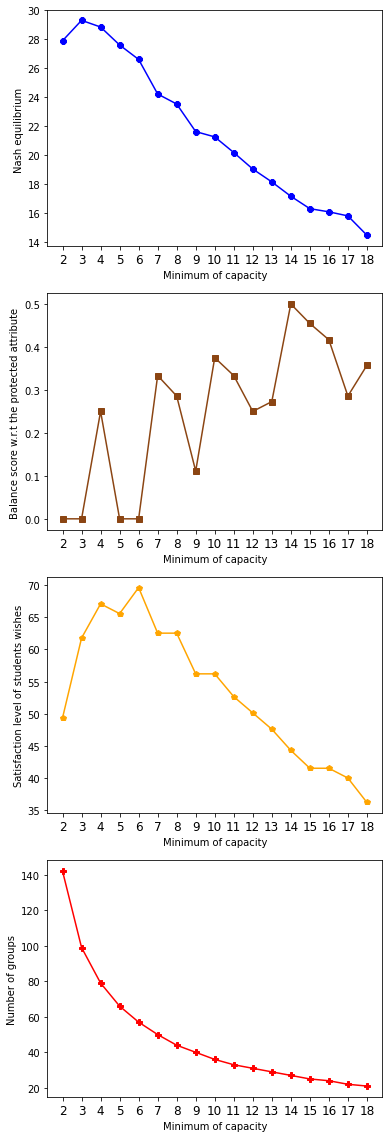

In [10]:
plot_analysis(base_curr_min_cap, base_curr_nash_log, base_curr_balances, base_curr_satisfied, base_curr_n_clusters, step_size=1, file_name = 'Student-mat-Baseline_nash_balance_satisfied_wish_3_topic_200.pdf')

## Baseline CPLEX

In [11]:
dataname = 'student-mat'
min_of_min_cap = 9
base_cplex_curr_min_cap, base_cplex_curr_nash, base_cplex_curr_satisfied, base_cplex_curr_balances, base_cplex_curr_capacities , base_cplex_curr_n_clusters, base_cplex_curr_count_instances, base_cplex_curr_tracking = run_experiment_CPLEX(dataname,df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap,protected_att = protected_att,male = male,  alpha = alpha, beta = beta, verbose = True)
base_cplex_curr_nash_log = [math.log(base_cplex_curr_nash[id],base_cplex_curr_n_clusters[id]) if base_cplex_curr_n_clusters[id]>1 else np.nan for id in range(len(base_cplex_curr_nash))]

D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:390: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 9 : 1.320 seconds.
Time taken for min of capacity 10 : 5.253 seconds.
Time taken for min of capacity 11 : 4.366 seconds.
Time taken for min of capacity 12 : 3.441 seconds.
Time taken for min of capacity 13 : 2.459 seconds.
Time taken for min of capacity 14 : 1.981 seconds.
Time taken for min of capacity 15 : 1.367 seconds.
Time taken for min of capacity 16 : 1.061 seconds.
Time taken for min of capacity 17 : 0.634 seconds.
Time taken for min of capacity 18 : 0.564 seconds.


In [12]:
min_of_min_cap = 2

In [13]:
for id in range(0,7):
    base_cplex_curr_nash_log.insert(id,np.nan)
    base_cplex_curr_balances.insert(id,np.nan)
    base_cplex_curr_satisfied.insert(id,np.nan)
    base_cplex_curr_n_clusters.insert(id,np.nan)
    base_cplex_curr_capacities.insert(id,np.nan)

## Knapsack

In [14]:
knapsack_curr_min_cap, knapsack_curr_nash, knapsack_curr_satisfied, knapsack_curr_balances, knapsack_curr_capacities , knapsack_curr_n_clusters, knapsack_curr_count_instances, knapsack_curr_tracking = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = 1, beta = 1, verbose = True)

D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:222: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 0.877 seconds.
Time taken for min of capacity 3 : 0.901 seconds.
Time taken for min of capacity 4 : 0.964 seconds.
Time taken for min of capacity 5 : 0.888 seconds.
Time taken for min of capacity 6 : 1.076 seconds.
Time taken for min of capacity 7 : 1.045 seconds.
Time taken for min of capacity 8 : 0.978 seconds.
Time taken for min of capacity 9 : 1.026 seconds.
Time taken for min of capacity 10 : 1.190 seconds.
Time taken for min of capacity 11 : 1.242 seconds.
Time taken for min of capacity 12 : 1.321 seconds.
Time taken for min of capacity 13 : 1.352 seconds.
Time taken for min of capacity 14 : 1.366 seconds.
Time taken for min of capacity 15 : 1.486 seconds.
Time taken for min of capacity 16 : 1.582 seconds.
Time taken for min of capacity 17 : 1.652 seconds.
Time taken for min of capacity 18 : 1.606 seconds.


In [15]:
knapsack_curr_nash_log = [math.log(knapsack_curr_nash[id],knapsack_curr_n_clusters[id]) for id in range(len(knapsack_curr_nash))]

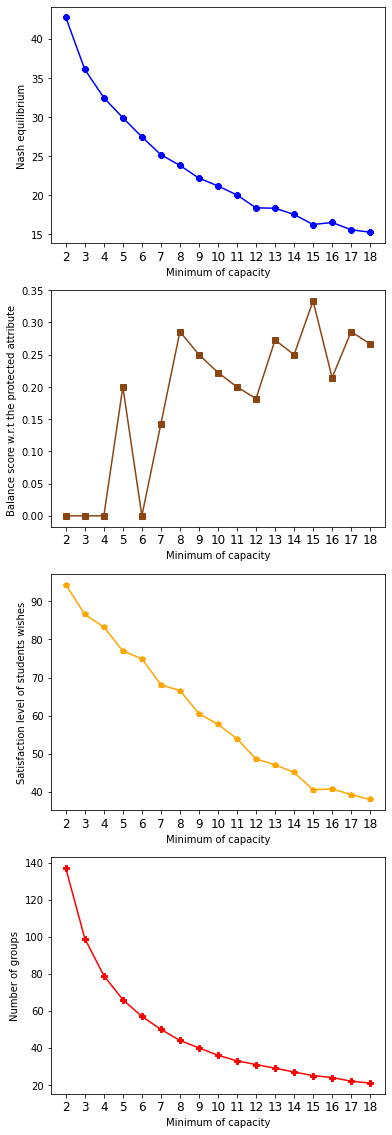

In [16]:
plot_analysis(knapsack_curr_min_cap, knapsack_curr_nash_log, knapsack_curr_balances, knapsack_curr_satisfied, knapsack_curr_n_clusters, step_size=1, file_name = 'Student-mat-Knapsack_nash_balance_satisfied_wish_3_topic_100.pdf')

## MCF-Knapsack

In [17]:
mfc_knapsack_curr_min_cap, mfc_knapsack_curr_nash, mfc_knapsack_curr_satisfied, mfc_knapsack_curr_balances, mfc_knapsack_curr_capacities , mfc_knapsack_curr_n_clusters, mfc_knapsack_curr_count_instances, mfc_knapsack_curr_tracking = run_experiment_mfc_knapsack(df, n_wishes, n_topic, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',theta = balance_score(df,protected_att,male), alpha = 1, beta = 1,  verbose = True)

female: 208
male: 187


D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:304: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 2.465 seconds.
Time taken for min of capacity 3 : 2.406 seconds.
Time taken for min of capacity 4 : 2.584 seconds.
Time taken for min of capacity 5 : 2.420 seconds.
Time taken for min of capacity 6 : 2.980 seconds.
Time taken for min of capacity 7 : 3.187 seconds.
Time taken for min of capacity 8 : 3.589 seconds.
Time taken for min of capacity 9 : 3.508 seconds.
Time taken for min of capacity 10 : 3.770 seconds.
Time taken for min of capacity 11 : 3.841 seconds.
Time taken for min of capacity 12 : 4.243 seconds.
Time taken for min of capacity 13 : 5.765 seconds.
Time taken for min of capacity 14 : 4.407 seconds.
Time taken for min of capacity 15 : 4.702 seconds.
Time taken for min of capacity 16 : 5.154 seconds.
Time taken for min of capacity 17 : 5.181 seconds.
Time taken for min of capacity 18 : 5.376 seconds.


In [18]:
mfc_knapsack_curr_nash_log = [math.log(mfc_knapsack_curr_nash[id],mfc_knapsack_curr_n_clusters[id]) for id in range(len(mfc_knapsack_curr_nash))]

## Comparison plot

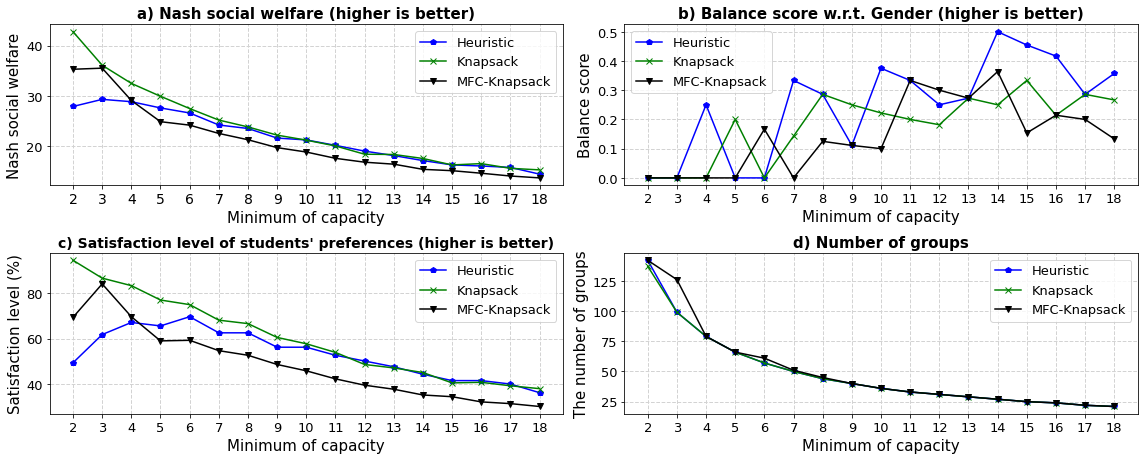

In [38]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 6.5))
ax[0,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium 
#ax[0,0].plot(base_cplex_curr_nash_log, marker='d', color='orange', label="CPLEX")
ax[0,0].plot(base_curr_nash_log, marker='p', color='blue', label="Heuristic")
ax[0,0].plot(knapsack_curr_nash_log, marker='x', color='green', label="Knapsack")
ax[0,0].plot(mfc_knapsack_curr_nash_log, marker='v', color='black', label="MFC-Knapsack")
ax[0,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=14)
ax[0,0].yaxis.set_tick_params(labelsize=13)
ax[0,0].set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[0,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].set_ylabel("Nash social welfare",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].legend(fontsize=13)

#Balance score wrt protected attribute 
ax[0,1].grid(color='lightgrey', linestyle='--', linewidth=1)
#ax[0,1].plot(base_cplex_curr_balances, marker='d', color='orange', label="CPLEX")
ax[0,1].plot(base_curr_balances, marker='p', color='blue', label="Heuristic")
ax[0,1].plot(knapsack_curr_balances, marker='x', color='green', label="Knapsack")
ax[0,1].plot(mfc_knapsack_curr_balances, marker='v', color='black', label="MFC-Knapsack")
ax[0,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,1].yaxis.set_tick_params(labelsize=13)
ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[0,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].set_ylabel("Balance score",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].legend(fontsize=13)

#Satisfaction level 
ax[1,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#ax[1,0].plot(base_cplex_curr_satisfied, marker='d', color='orange', label="CPLEX")
ax[1,0].plot(base_curr_satisfied, marker='p', color='blue', label="Heuristic")
ax[1,0].plot(knapsack_curr_satisfied, marker='x', color='green', label="Knapsack")
ax[1,0].plot(mfc_knapsack_curr_satisfied, marker='v', color='black', label="MFC-Knapsack")
ax[1,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,0].yaxis.set_tick_params(labelsize=13)
ax[1,0].set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax[1,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].legend(fontsize=13)

#Number of groups
ax[1,1].grid(color='lightgrey', linestyle='--', linewidth=1)
#ax[1,1].plot(base_cplex_curr_n_clusters, marker='d', color='orange', label="CPLEX")
ax[1,1].plot(base_curr_n_clusters, marker='p', color='blue', label="Heuristic")
ax[1,1].plot(knapsack_curr_n_clusters, marker='x', color='green', label="Knapsack")
ax[1,1].plot(mfc_knapsack_curr_n_clusters, marker='v', color='black', label="MFC-Knapsack")
ax[1,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,1].yaxis.set_tick_params(labelsize=13)
ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[1,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].set_ylabel("The number of groups",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].legend(fontsize=13)
plt.tight_layout()
plt.savefig('Plot_student_mat.pdf',bbox_inches='tight')
plt.show()

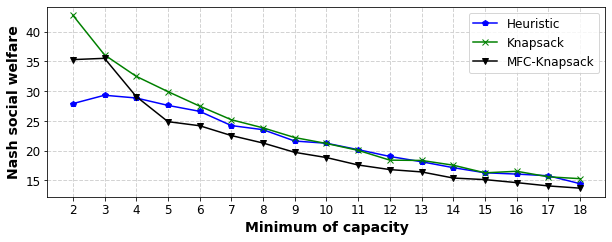

In [39]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium 
#ax.plot(base_cplex_curr_nash_log, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_nash_log, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_nash_log, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_nash_log, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Nash social welfare",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_mat.Nash.pdf',bbox_inches='tight')
plt.show()

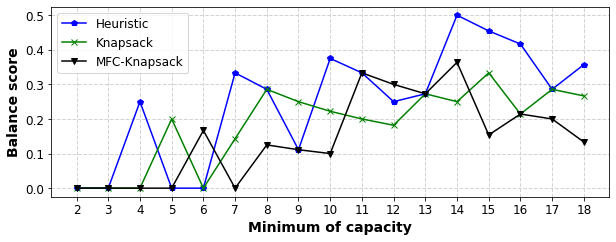

In [40]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Balance score wrt protected attribute 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#ax.plot(base_cplex_curr_balances, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_balances, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_balances, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_balances, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Balance score",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_mat.Balance.pdf',bbox_inches='tight')
plt.show()

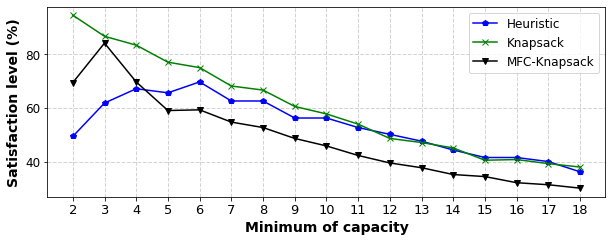

In [41]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Satisfaction level 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#ax.plot(base_cplex_curr_satisfied, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_satisfied, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_satisfied, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_satisfied, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_mat.Satisfaction.pdf',bbox_inches='tight')
plt.show()

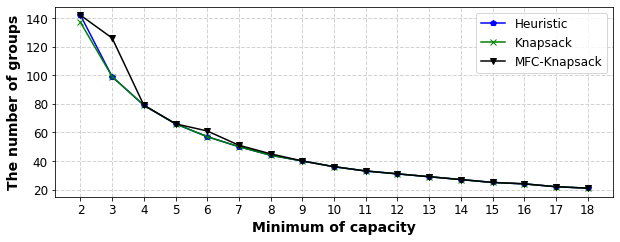

In [42]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Number of groups
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#ax.plot(base_cplex_curr_n_clusters, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_n_clusters, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_n_clusters, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_n_clusters, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("d) Number of groups",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("The number of groups",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_mat.Number.pdf',bbox_inches='tight')
plt.show()

# Effect of parameters

In [24]:
alpha = 0.1
beta = 1
knapsack_curr_min_cap01, knapsack_curr_nash01, knapsack_curr_satisfied01, knapsack_curr_balances01, knapsack_curr_capacities01 , knapsack_curr_n_clusters01, knapsack_curr_count_instances01, knapsack_curr_tracking01 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log01 = [math.log(knapsack_curr_nash01[id],knapsack_curr_n_clusters01[id]) for id in range(len(knapsack_curr_nash01))]

D:\FairEdu\knapsack\MFC-knapsack h3\experiment.py:222: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 2 : 0.913 seconds.
Time taken for min of capacity 3 : 0.933 seconds.
Time taken for min of capacity 4 : 0.888 seconds.
Time taken for min of capacity 5 : 0.967 seconds.
Time taken for min of capacity 6 : 0.875 seconds.
Time taken for min of capacity 7 : 1.002 seconds.
Time taken for min of capacity 8 : 1.051 seconds.
Time taken for min of capacity 9 : 1.141 seconds.
Time taken for min of capacity 10 : 1.236 seconds.
Time taken for min of capacity 11 : 1.328 seconds.
Time taken for min of capacity 12 : 1.214 seconds.
Time taken for min of capacity 13 : 1.339 seconds.
Time taken for min of capacity 14 : 1.501 seconds.
Time taken for min of capacity 15 : 1.487 seconds.
Time taken for min of capacity 16 : 1.546 seconds.
Time taken for min of capacity 17 : 1.495 seconds.
Time taken for min of capacity 18 : 1.560 seconds.


In [25]:
alpha = 0.5
beta = 1
knapsack_curr_min_cap51, knapsack_curr_nash51, knapsack_curr_satisfied51, knapsack_curr_balances51, knapsack_curr_capacities51 , knapsack_curr_n_clusters51, knapsack_curr_count_instances51, knapsack_curr_tracking51 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log51 = [math.log(knapsack_curr_nash51[id],knapsack_curr_n_clusters51[id]) for id in range(len(knapsack_curr_nash51))]

Time taken for min of capacity 2 : 0.991 seconds.
Time taken for min of capacity 3 : 0.868 seconds.
Time taken for min of capacity 4 : 0.933 seconds.
Time taken for min of capacity 5 : 0.919 seconds.
Time taken for min of capacity 6 : 0.999 seconds.
Time taken for min of capacity 7 : 1.025 seconds.
Time taken for min of capacity 8 : 1.119 seconds.
Time taken for min of capacity 9 : 1.074 seconds.
Time taken for min of capacity 10 : 1.178 seconds.
Time taken for min of capacity 11 : 1.185 seconds.
Time taken for min of capacity 12 : 1.332 seconds.
Time taken for min of capacity 13 : 1.427 seconds.
Time taken for min of capacity 14 : 1.535 seconds.
Time taken for min of capacity 15 : 1.438 seconds.
Time taken for min of capacity 16 : 1.523 seconds.
Time taken for min of capacity 17 : 1.578 seconds.
Time taken for min of capacity 18 : 1.549 seconds.


In [26]:
alpha = 1
beta = 0.1
knapsack_curr_min_cap10, knapsack_curr_nash10, knapsack_curr_satisfied10, knapsack_curr_balances10, knapsack_curr_capacities10 , knapsack_curr_n_clusters10, knapsack_curr_count_instances10, knapsack_curr_tracking10 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log10 = [math.log(knapsack_curr_nash10[id],knapsack_curr_n_clusters10[id]) for id in range(len(knapsack_curr_nash10))]

Time taken for min of capacity 2 : 0.928 seconds.
Time taken for min of capacity 3 : 0.933 seconds.
Time taken for min of capacity 4 : 0.978 seconds.
Time taken for min of capacity 5 : 0.933 seconds.
Time taken for min of capacity 6 : 1.067 seconds.
Time taken for min of capacity 7 : 1.034 seconds.
Time taken for min of capacity 8 : 1.060 seconds.
Time taken for min of capacity 9 : 1.140 seconds.
Time taken for min of capacity 10 : 1.202 seconds.
Time taken for min of capacity 11 : 1.268 seconds.
Time taken for min of capacity 12 : 1.292 seconds.
Time taken for min of capacity 13 : 1.396 seconds.
Time taken for min of capacity 14 : 1.361 seconds.
Time taken for min of capacity 15 : 1.379 seconds.
Time taken for min of capacity 16 : 1.473 seconds.
Time taken for min of capacity 17 : 1.529 seconds.
Time taken for min of capacity 18 : 1.574 seconds.


In [27]:
alpha = 1
beta = 0.5
knapsack_curr_min_cap15, knapsack_curr_nash15, knapsack_curr_satisfied15, knapsack_curr_balances15, knapsack_curr_capacities15 , knapsack_curr_n_clusters15, knapsack_curr_count_instances15, knapsack_curr_tracking15 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log15 = [math.log(knapsack_curr_nash15[id],knapsack_curr_n_clusters15[id]) for id in range(len(knapsack_curr_nash15))]

Time taken for min of capacity 2 : 1.028 seconds.
Time taken for min of capacity 3 : 0.965 seconds.
Time taken for min of capacity 4 : 0.838 seconds.
Time taken for min of capacity 5 : 0.950 seconds.
Time taken for min of capacity 6 : 0.942 seconds.
Time taken for min of capacity 7 : 1.078 seconds.
Time taken for min of capacity 8 : 1.139 seconds.
Time taken for min of capacity 9 : 1.165 seconds.
Time taken for min of capacity 10 : 1.184 seconds.
Time taken for min of capacity 11 : 1.195 seconds.
Time taken for min of capacity 12 : 1.270 seconds.
Time taken for min of capacity 13 : 1.459 seconds.
Time taken for min of capacity 14 : 1.465 seconds.
Time taken for min of capacity 15 : 1.648 seconds.
Time taken for min of capacity 16 : 1.439 seconds.
Time taken for min of capacity 17 : 1.525 seconds.
Time taken for min of capacity 18 : 1.608 seconds.


In [28]:
alpha = 1
beta = 1
knapsack_curr_min_cap11, knapsack_curr_nash11, knapsack_curr_satisfied11, knapsack_curr_balances11, knapsack_curr_capacities11 , knapsack_curr_n_clusters11, knapsack_curr_count_instances11, knapsack_curr_tracking11 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log11 = [math.log(knapsack_curr_nash11[id],knapsack_curr_n_clusters11[id]) for id in range(len(knapsack_curr_nash11))]

Time taken for min of capacity 2 : 0.894 seconds.
Time taken for min of capacity 3 : 0.864 seconds.
Time taken for min of capacity 4 : 0.902 seconds.
Time taken for min of capacity 5 : 0.884 seconds.
Time taken for min of capacity 6 : 1.081 seconds.
Time taken for min of capacity 7 : 1.011 seconds.
Time taken for min of capacity 8 : 1.070 seconds.
Time taken for min of capacity 9 : 1.096 seconds.
Time taken for min of capacity 10 : 1.151 seconds.
Time taken for min of capacity 11 : 1.372 seconds.
Time taken for min of capacity 12 : 1.297 seconds.
Time taken for min of capacity 13 : 1.308 seconds.
Time taken for min of capacity 14 : 1.377 seconds.
Time taken for min of capacity 15 : 1.432 seconds.
Time taken for min of capacity 16 : 1.569 seconds.
Time taken for min of capacity 17 : 1.434 seconds.
Time taken for min of capacity 18 : 1.606 seconds.


In [29]:
alpha = 0.1
beta = 0.1
knapsack_curr_min_cap00, knapsack_curr_nash00, knapsack_curr_satisfied00, knapsack_curr_balances00, knapsack_curr_capacities00 , knapsack_curr_n_clusters00, knapsack_curr_count_instances00, knapsack_curr_tracking00 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log00 = [math.log(knapsack_curr_nash00[id],knapsack_curr_n_clusters00[id]) for id in range(len(knapsack_curr_nash00))]

Time taken for min of capacity 2 : 0.978 seconds.
Time taken for min of capacity 3 : 0.939 seconds.
Time taken for min of capacity 4 : 0.837 seconds.
Time taken for min of capacity 5 : 0.969 seconds.
Time taken for min of capacity 6 : 0.948 seconds.
Time taken for min of capacity 7 : 1.073 seconds.
Time taken for min of capacity 8 : 1.073 seconds.
Time taken for min of capacity 9 : 1.131 seconds.
Time taken for min of capacity 10 : 1.203 seconds.
Time taken for min of capacity 11 : 1.137 seconds.
Time taken for min of capacity 12 : 1.263 seconds.
Time taken for min of capacity 13 : 1.400 seconds.
Time taken for min of capacity 14 : 1.376 seconds.
Time taken for min of capacity 15 : 1.445 seconds.
Time taken for min of capacity 16 : 1.575 seconds.
Time taken for min of capacity 17 : 1.794 seconds.
Time taken for min of capacity 18 : 1.716 seconds.


In [30]:
alpha = 0.5
beta = 0.5
knapsack_curr_min_cap55, knapsack_curr_nash55, knapsack_curr_satisfied55, knapsack_curr_balances55, knapsack_curr_capacities55 , knapsack_curr_n_clusters55, knapsack_curr_count_instances55, knapsack_curr_tracking55 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log55 = [math.log(knapsack_curr_nash55[id],knapsack_curr_n_clusters55[id]) for id in range(len(knapsack_curr_nash55))]

Time taken for min of capacity 2 : 0.878 seconds.
Time taken for min of capacity 3 : 0.895 seconds.
Time taken for min of capacity 4 : 0.988 seconds.
Time taken for min of capacity 5 : 0.922 seconds.
Time taken for min of capacity 6 : 1.037 seconds.
Time taken for min of capacity 7 : 1.242 seconds.
Time taken for min of capacity 8 : 1.173 seconds.
Time taken for min of capacity 9 : 1.171 seconds.
Time taken for min of capacity 10 : 1.118 seconds.
Time taken for min of capacity 11 : 1.187 seconds.
Time taken for min of capacity 12 : 1.250 seconds.
Time taken for min of capacity 13 : 1.354 seconds.
Time taken for min of capacity 14 : 1.399 seconds.
Time taken for min of capacity 15 : 1.512 seconds.
Time taken for min of capacity 16 : 1.534 seconds.
Time taken for min of capacity 17 : 1.543 seconds.
Time taken for min of capacity 18 : 1.520 seconds.


In [31]:
alpha = 0.1
beta = 0.5
knapsack_curr_min_cap05, knapsack_curr_nash05, knapsack_curr_satisfied05, knapsack_curr_balances05, knapsack_curr_capacities05 , knapsack_curr_n_clusters05, knapsack_curr_count_instances05, knapsack_curr_tracking05 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log05 = [math.log(knapsack_curr_nash05[id],knapsack_curr_n_clusters05[id]) for id in range(len(knapsack_curr_nash05))]

Time taken for min of capacity 2 : 0.962 seconds.
Time taken for min of capacity 3 : 0.971 seconds.
Time taken for min of capacity 4 : 0.931 seconds.
Time taken for min of capacity 5 : 0.905 seconds.
Time taken for min of capacity 6 : 1.235 seconds.
Time taken for min of capacity 7 : 1.089 seconds.
Time taken for min of capacity 8 : 1.088 seconds.
Time taken for min of capacity 9 : 1.198 seconds.
Time taken for min of capacity 10 : 1.089 seconds.
Time taken for min of capacity 11 : 1.177 seconds.
Time taken for min of capacity 12 : 1.336 seconds.
Time taken for min of capacity 13 : 1.355 seconds.
Time taken for min of capacity 14 : 1.566 seconds.
Time taken for min of capacity 15 : 1.388 seconds.
Time taken for min of capacity 16 : 1.699 seconds.
Time taken for min of capacity 17 : 1.583 seconds.
Time taken for min of capacity 18 : 1.596 seconds.


In [32]:
alpha = 0.5
beta = 0.1
knapsack_curr_min_cap50, knapsack_curr_nash50, knapsack_curr_satisfied50, knapsack_curr_balances50, knapsack_curr_capacities50 , knapsack_curr_n_clusters50, knapsack_curr_count_instances50, knapsack_curr_tracking50 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log50 = [math.log(knapsack_curr_nash50[id],knapsack_curr_n_clusters50[id]) for id in range(len(knapsack_curr_nash50))]

Time taken for min of capacity 2 : 0.895 seconds.
Time taken for min of capacity 3 : 0.899 seconds.
Time taken for min of capacity 4 : 0.996 seconds.
Time taken for min of capacity 5 : 0.916 seconds.
Time taken for min of capacity 6 : 1.083 seconds.
Time taken for min of capacity 7 : 1.185 seconds.
Time taken for min of capacity 8 : 1.125 seconds.
Time taken for min of capacity 9 : 1.227 seconds.
Time taken for min of capacity 10 : 1.374 seconds.
Time taken for min of capacity 11 : 1.212 seconds.
Time taken for min of capacity 12 : 1.344 seconds.
Time taken for min of capacity 13 : 1.323 seconds.
Time taken for min of capacity 14 : 1.450 seconds.
Time taken for min of capacity 15 : 1.519 seconds.
Time taken for min of capacity 16 : 1.554 seconds.
Time taken for min of capacity 17 : 1.656 seconds.
Time taken for min of capacity 18 : 1.729 seconds.


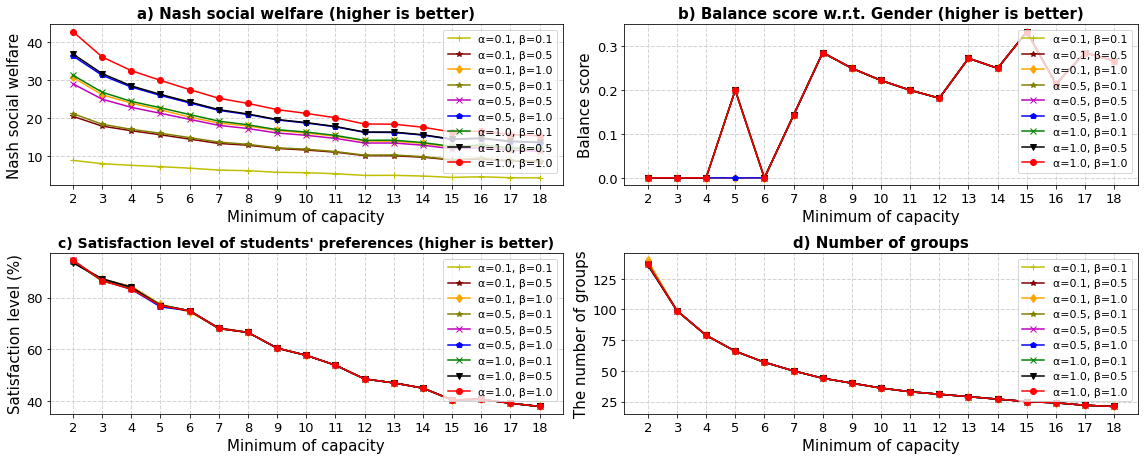

In [33]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 6.5))
ax[0,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax[0,0].plot(knapsack_curr_nash_log00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[0,0].plot(knapsack_curr_nash_log50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[0,0].plot(knapsack_curr_nash_log10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax[0,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,0].yaxis.set_tick_params(labelsize=13)
ax[0,0].set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[0,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].set_ylabel("Nash social welfare",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].legend(fontsize=11,loc='upper right')

#Balance score wrt protected attribute 
ax[0,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[0,1].plot(knapsack_curr_balances00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[0,1].plot(knapsack_curr_balances50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[0,1].plot(knapsack_curr_balances10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[0,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,1].yaxis.set_tick_params(labelsize=13)
ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[0,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].set_ylabel("Balance score",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].legend(fontsize=11,loc='upper right')

#Satisfaction level 
ax[1,0].grid(color='lightgrey', linestyle='--', linewidth=1)

ax[1,0].plot(knapsack_curr_satisfied00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[1,0].plot(knapsack_curr_satisfied50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[1,0].plot(knapsack_curr_satisfied10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[1,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,0].yaxis.set_tick_params(labelsize=13)
ax[1,0].set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax[1,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].legend(fontsize=11,loc='upper right')

#Number of groups
ax[1,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[1,1].plot(knapsack_curr_n_clusters00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[1,1].plot(knapsack_curr_n_clusters50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[1,1].plot(knapsack_curr_n_clusters10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[1,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,1].yaxis.set_tick_params(labelsize=13)
ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[1,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].set_ylabel("The number of groups",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].legend(fontsize=11,loc='upper right')
plt.tight_layout()
file_output_name = 'Plot_student_mat_alpha_beta.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()

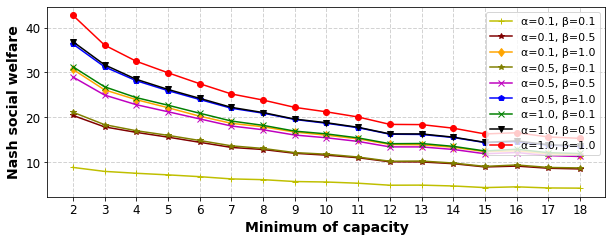

In [34]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax.plot(knapsack_curr_nash_log00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_nash_log50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_nash_log10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Nash social welfare",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_mat_alpha_beta.Nash.pdf",bbox_inches='tight')
plt.show()

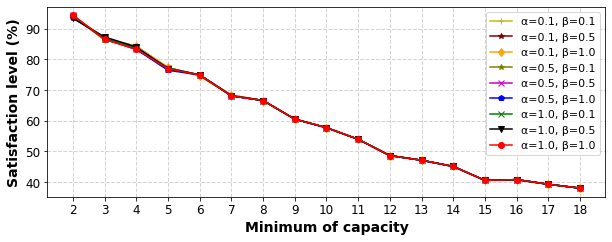

In [35]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Satisfaction level 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_satisfied00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_satisfied50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_satisfied10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_mat_alpha_beta.Satisfaction.pdf",bbox_inches='tight')
plt.show()

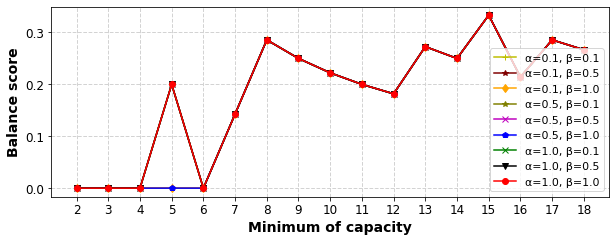

In [36]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Balance score wrt protected attribute 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_balances00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_balances05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_balances01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_balances50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_balances55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_balances51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_balances10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_balances15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_balances11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Balance score",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='lower right')
plt.savefig("mfc.Plot_student_mat_alpha_beta.Balance.pdf",bbox_inches='tight')
plt.show()

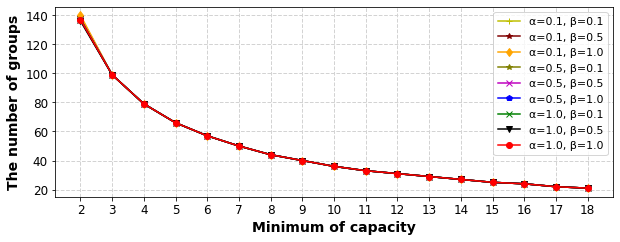

In [37]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Number of groups
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_n_clusters00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_n_clusters50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_n_clusters10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("The number of groups",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_mat_alpha_beta.Number.pdf",bbox_inches='tight')
plt.show()